In [15]:
# import stuff from sympy
from sympy import *
import random
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# x, y, z, t = symbols('x y z t')
# k, m, n = symbols('k m n', integer=True)
# f, g, h = symbols('f g h', cls=Function)

In [2]:
# THIS IS WRONG - SOMEHOW !!! DO NOT USE - gives transpose?
def rs_element(X, r, s, h):
    """
    Function that computes the r,s element of the matrix L for triangular kernel
    using the Nadaraya-Watson estimator, where \hat{Y} = LY
    
    X: input data predictors
    r: row r
    s: column s
    h: bandwidth
    """
    n = len(X)
    numerator = h - abs(X[r] - X[s])
    sum = 0
    for i in range(n):
        sum += abs(X[r] - X[i])
    denominator = n*h - sum
    print(denominator)
    return(numerator/denominator)

In [2]:
def triangular_kernel(x, xi, h):
    """
    Function for triangular kernel
    """
    if np.abs(x-xi)<h:
        return 1 - np.abs(x-xi)/h
    else:
        return 0

def triangular_weights(X, i, h):
    """
    Function that computes the weights for the triangular kernel for a given X list.
    This is the same as the column i of projection matrix L.
    
    w_i(x) = K[(x-xi)/h]/sum{K[(x-xj)/h]}
    """
    result = []
    for x in X:
        numerator = triangular_kernel(x, X[i], h)
        denominator = 0
        for xj in X:
            denominator += triangular_kernel(x, xj, h)
        result.append(numerator/denominator)
    return(np.array(result))

def denominator_list(X, h):
    """
    Function that computes the common denominators in the matrix L for triangular kernel
    using the Nadaraya-Watson estimator, where \hat{Y} = LY
    
    X: input data predictors
    h: bandwidth
    """
    n = len(X)
    result = []
    for xj in X:
        result.append(n*h - np.sum(np.abs(X-xj)))
    return(np.array(result))
    #denominator = n*h - sum
    #print(denominator)
    #return(numerator/denominator)
    
def build_L_matrix(X, h):
    """
    Function that builds the smoothing L matrix for triangular kernel using
    the Nadaraya-Watson estimator, where \hat{Y} = LY
    
    X: input data predictors
    h: bandwidth
    """
    n = len(X)
    L = np.zeros((n,n))
    den_list = denominator_list(X, h)
    for s in range(n):
        L[:,s] = triangular_weights(X, s, h)
    return(L)

In [182]:
X = np.array([3, 4.3, 6, 7, 9.1, 10.3])
h = 2
L = build_L_matrix(X, h)
print(L)

[[0.74074074 0.25925926 0.         0.         0.         0.        ]
 [0.23333333 0.66666667 0.1        0.         0.         0.        ]
 [0.         0.09090909 0.60606061 0.3030303  0.         0.        ]
 [0.         0.         0.33333333 0.66666667 0.         0.        ]
 [0.         0.         0.         0.         0.71428571 0.28571429]
 [0.         0.         0.         0.         0.28571429 0.71428571]]


In [184]:
# "pretty" print using sympy
Matrix(np.around(L, 3))
latex(Matrix(np.around(L, 3))) # for LaTeX output

'\\left[\\begin{matrix}0.741 & 0.259 & 0.0 & 0.0 & 0.0 & 0.0\\\\0.233 & 0.667 & 0.1 & 0.0 & 0.0 & 0.0\\\\0.0 & 0.091 & 0.606 & 0.303 & 0.0 & 0.0\\\\0.0 & 0.0 & 0.333 & 0.667 & 0.0 & 0.0\\\\0.0 & 0.0 & 0.0 & 0.0 & 0.714 & 0.286\\\\0.0 & 0.0 & 0.0 & 0.0 & 0.286 & 0.714\\end{matrix}\\right]'

## 1.2  Computing prediction

In [185]:
Y = np.array([0, 1, 2, 2, 4, 3])

In [186]:
Y_hat = L@Y

In [187]:
Y_hat

array([0.25925926, 0.86666667, 1.90909091, 2.        , 3.71428571,
       3.28571429])

In [188]:
# "pretty" print using sympy
Matrix(np.around(Y_hat, 3))
latex(Matrix(np.around(Y_hat, 3))) # for LaTeX output

'\\left[\\begin{matrix}0.259\\\\0.867\\\\1.909\\\\2.0\\\\3.714\\\\3.286\\end{matrix}\\right]'

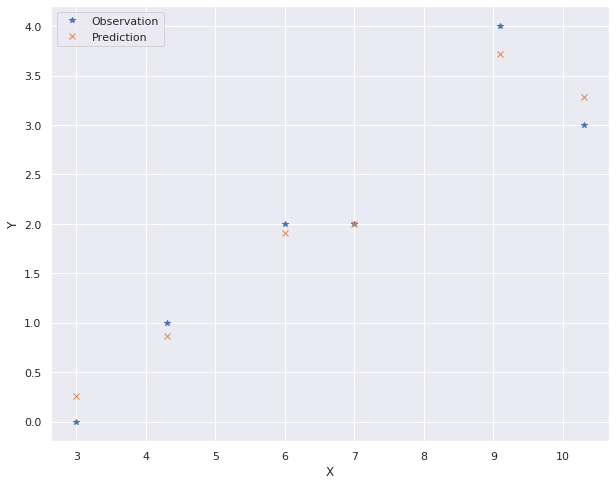

In [16]:
# Plotting prediction
plt.figure(figsize=(10,8))
plt.plot(X, Y, '*', label="Observation")
plt.plot(X, Y_hat, 'x', label="Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## 1. 3 Computing MSE by LOOCV and GCV

The idea here is to compute the MSE by LOOCV in a "manual" way and then extend it using the Generalized Cross Validation method/formula.

$$
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum_{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}
$$

In [189]:
n = len(X)  # size of data
# choosing a random index to leave out
leave_i = random.randint(0, n-1)  # index to leave out

Y_loocv = np.delete(Y, leave_i)

# Computing model with new data
X_loocv = np.delete(X, leave_i)
n_loocv = len(X)-1
h = 2
L_loocv = build_L_matrix(X_loocv, h)
# prediction
Y_hat_loocv = L_loocv@Y_loocv
        
# performing MSE computation
print(np.sum((Y_loocv-Y_hat_loocv)**2))
MSE_loocv = np.sum((Y_loocv-Y_hat_loocv)**2)/n_loocv

0.093257604099355


In [190]:
MSE_loocv

0.018651520819871002

In [191]:
L_loocv

array([[0.74074074, 0.25925926, 0.        , 0.        , 0.        ],
       [0.23333333, 0.66666667, 0.1       , 0.        , 0.        ],
       [0.        , 0.09090909, 0.60606061, 0.3030303 , 0.        ],
       [0.        , 0.        , 0.33333333, 0.66666667, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [192]:
leave_i

4

In [193]:
np.sqrt(MSE_loocv)

0.13657057084112595

BUT, there's another _shortcut_ to compute the MSE for the LOOCV case, as


$$
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum_{i=1}^{n}\left(\frac{Y_{i}-{\hat {Y_{i}}}}{1-h_{ii}}\right)^{2}.} 
$$

Where $h_{ii}$ is the **leverage**, which is the diagonal element of the projection matrix $L$.

Let's see if this indeed gives the same result.

In [194]:
# performing MSE computation
n = len(X)
MSE_loocv_2 = np.sum(((Y-Y_hat)/(1-L[leave_i, leave_i]))**2)/n

In [195]:
print(MSE_loocv_2)

0.5237342750361837


In [196]:
MSE_loocv_2 - MSE_loocv

0.5050827542163128

### GCV
The GCV is computed as 
$$
{\displaystyle \operatorname {MSE_{GCV}} ={\frac {1}{n}}\sum_{i=1}^{n}\frac{\left(Y_{i}-{\hat {Y_{i}}}\right)^{2}}{1-v/n}.} 
$$
Where $v=\text{Tr}(L)$

In [197]:
v = L.trace()
MSE_gcv = (np.sum((Y-Y_hat)**2)/(1-v/n)**2)/n

In [198]:
MSE_gcv

0.4302881332603392

In [114]:
MSE_loocv_2 - MSE_gcv

0.2491508123441171

## 1.4
Trying to see $h$ dependance, is $h=2.8$ better?

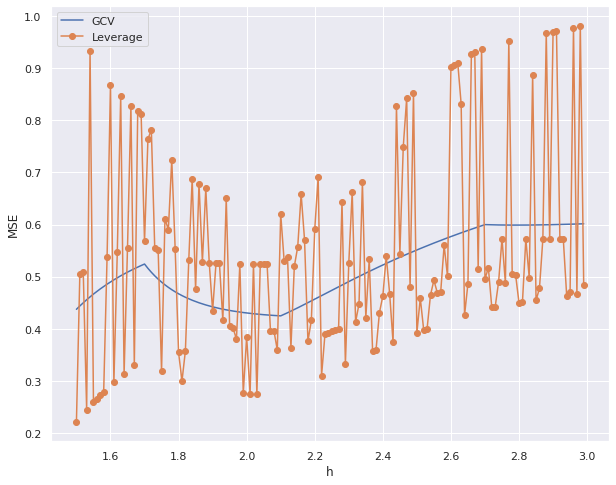

In [199]:
hlist = np.arange(1.5,3,0.01)
MSE_gcv_list = []
MSE_loocv_list = []
for hi in hlist:
    L = build_L_matrix(X, hi)
    Y_hat = L@Y
    v = L.trace()
    MSE_gcv_list.append((np.sum((Y-Y_hat)**2)/(1-v/n)**2)/n)
    leave_i = random.randint(0, n-1)  # index to leave out
    MSE_loocv_list.append(np.sum(((Y-Y_hat)/(1-L[leave_i, leave_i]))**2)/n)
# Plotting
plt.figure(figsize=(10,8))
plt.plot(hlist, MSE_gcv_list, label="GCV")
plt.plot(hlist, MSE_loocv_list, '-o', label="Leverage")
plt.xlabel("h")
plt.ylabel("MSE")
plt.legend()

According to this, and considering that using the leverage is very noisy, GCV tells that we get less error for a value of $h=2.0$ compared to $h=2.8$, even though that when calculating the error with the leverage formulat it gives better result for $h=2.8$ but it's very variant, so we don't trust that.